In [1]:
import pandas as pd
import sqlite3
engine = sqlite3.connect('HW1_DB')
# airports_df = pd.read_sql('select * from airports_df_table', engine)
# airlines_df = pd.read_sql('select * from airlines_df_table', engine)
# routes_df.to_sql('routes_df_table', engine, if_exists='replace')
routes = pd.read_sql('select * from routes_df', engine)
# routes.to_sql('routes_df_table', engine, if_exists='replace')
routes

,index,itat_or_icao_code,airline_id,source_airport_code,source_airport_id,destination_airport_code,destination_airport_id,codeshare,stop_number,equipment_code
0,0,2B,410,AER,2965,KZN,2990,,0,CR2
1,1,2B,410,ASF,2966,KZN,2990,,0,CR2
2,2,2B,410,ASF,2966,MRV,2962,,0,CR2
3,3,2B,410,CEK,2968,KZN,2990,,0,CR2
4,4,2B,410,CEK,2968,OVB,4078,,0,CR2
5,5,2B,410,DME,4029,KZN,2990,,0,CR2
6,6,2B,410,DME,4029,NBC,6969,,0,CR2
7,8,2B,410,DME,4029,UUA,6160,,0,CR2
8,9,2B,410,EGO,6156,KGD,2952,,0,CR2
9,10,2B,410,EGO,6156,KZN,2990,,0,CR2


# Step 6.1

In [2]:
import io
import requests
url_aug="https://www.cis.upenn.edu/~zives/bigdata/data/Flights-Aug-2016.csv"
url_sep="https://www.cis.upenn.edu/~zives/bigdata/data/Flights-Sep-2016.csv"
url_oct="https://www.cis.upenn.edu/~zives/bigdata/data/Flights-Oct-2016.csv"
aug_response = requests.get(url_aug)
sep_response = requests.get(url_sep)
oct_response = requests.get(url_oct)
# aug_csv = pd.read_csv(io.StringIO(aug_response.text))
# sep_csv = pd.read_csv(io.StringIO(sep_response.text))
# oct_csv = pd.read_csv(io.StringIO(oct_response.text))


In [3]:
fields = ['Year','Month','DayofMonth','Carrier','FlightNum','Origin','Dest','DepTime','ArrTime','ArrDelayMinutes','Cancelled']
aug_flights_df = pd.read_csv(io.StringIO(aug_response.text),usecols=fields)
sep_flights_df = pd.read_csv(io.StringIO(sep_response.text),usecols=fields)
oct_flights_df = pd.read_csv(io.StringIO(oct_response.text),usecols=fields)
aug_flights_df.to_sql('flights', engine, if_exists='replace')
sep_flights_df.to_sql('flights', engine, if_exists='append')
oct_flights_df.to_sql('flights', engine, if_exists='append')
df = pd.read_sql('select count(*) as num from flights', engine)
df

,num
0,1425851


# Step 6.2.1

In [4]:
sql = '''SELECT itat_or_icao_code, destination_airport_code, COUNT(*) AS num 
        FROM flights f JOIN routes_df r 
            ON f.Carrier = r.itat_or_icao_code 
            AND f.Origin=r.source_airport_code 
            AND f.Dest = r.destination_airport_code 
        GROUP BY itat_or_icao_code, destination_airport_code;'''
pd.read_sql(sql, engine)

,itat_or_icao_code,destination_airport_code,num
0,AA,ABQ,446
1,AA,ALB,255
2,AA,AMA,70
3,AA,ANC,44
4,AA,ATL,2832
5,AA,AUS,2265
6,AA,BDL,1015
7,AA,BNA,1418
8,AA,BOI,187
9,AA,BOS,7194


# Step 6.2.2

In [5]:
sql = '''SELECT itat_or_icao_code, destination_airport_code, COUNT(*) AS num 
        FROM flights f JOIN routes_df r 
            ON f.Carrier = r.itat_or_icao_code 
            AND f.Origin=r.source_airport_code 
            AND f.Dest = r.destination_airport_code 
        WHERE f.ArrDelayMinutes >= 30 
            OR f.Cancelled == 1 
        GROUP BY itat_or_icao_code, destination_airport_code;'''
pd.read_sql(sql, engine)

,itat_or_icao_code,destination_airport_code,num
0,AA,ABQ,67
1,AA,ALB,15
2,AA,AMA,9
3,AA,ANC,2
4,AA,ATL,297
5,AA,AUS,292
6,AA,BDL,134
7,AA,BNA,139
8,AA,BOI,15
9,AA,BOS,1115


In [6]:
pd.read_sql(sql, engine).set_index(['itat_or_icao_code', 'destination_airport_code'], inplace=True)

# Step 6.2.3

In [7]:
sql = '''SELECT itat_or_icao_code, destination_airport_code, COUNT(*) AS num 
        FROM flights f JOIN routes_df r 
            ON f.Carrier = r.itat_or_icao_code 
            AND f.Origin=r.source_airport_code 
            AND f.Dest = r.destination_airport_code 
        WHERE f.ArrDelayMinutes >= 30 
            OR f.Cancelled == 1 
        GROUP BY itat_or_icao_code, destination_airport_code 
        HAVING num > 1000;'''
re = pd.read_sql(sql, engine).set_index(['itat_or_icao_code', 'destination_airport_code'])
re

num
itat_or_icao_code destination_airport_code      
AA                BOS                       1115
                  CLT                       1951
                  DFW                       4114
                  LAX                       1441
                  LGA                       1103
                  MIA                       1879
                  ORD                       2337
                  PHL                       1208
                  PHX                       1464
B6                BOS                       1774
                  JFK                       1643
DL                ATL                       4539
                  DTW                       1001
                  LAX                       1007
                  MSP                       1409
F9                DEN                       1032
UA                DEN                       1004
                  EWR                       1920
                  IAH                       1201
                  LAX                       1338
                  ORD                       2641
                  SFO                       2473
WN                BWI                       1195
                  DEN                       1196
                  HOU                       1013
                  LAS                       1506
                  LAX                       1678
                  MDW                       1259
                  PHX                       1637

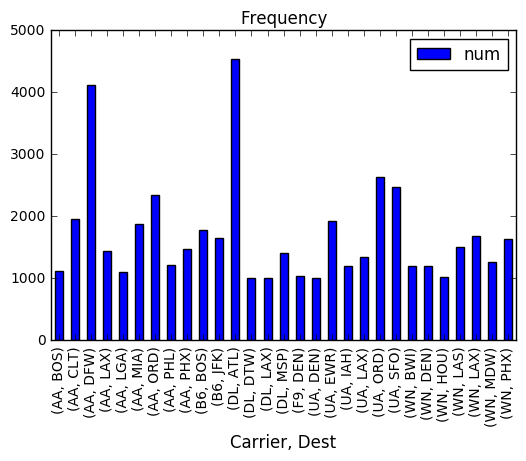

In [8]:
import matplotlib.pyplot as plt
plt.figure();
ax = re[['num']].plot(kind='bar', title ="Frequency")
ax.set_xlabel("Carrier, Dest", fontsize=12)
plt.show()

# Step 6.3

In [9]:
def fillna_col(series):
    if series.dtype is pd.np.dtype(object):
        return series.fillna('')
    else:
        return series

def nullify(x):
    if x == '\\N':
        return float('NaN')
    else:
        return x
    
sep_flights_df.to_sql('sep', engine, if_exists = 'replace')
sep = sep_flights_df.applymap(nullify).dropna(subset = ['DayofMonth','Origin','Dest','DepTime','ArrTime']).apply(fillna_col)
sep

,Year,Month,DayofMonth,Carrier,FlightNum,Origin,Dest,DepTime,ArrTime,ArrDelayMinutes,Cancelled
0,2016,9,1,AA,1,BOS,JFK,551.0,652.0,0.0,0.0
1,2016,9,2,AA,1,BOS,JFK,552.0,709.0,0.0,0.0
2,2016,9,6,AA,1,BOS,JFK,556.0,656.0,0.0,0.0
3,2016,9,8,AA,1,BOS,JFK,552.0,648.0,0.0,0.0
4,2016,9,9,AA,1,BOS,JFK,552.0,654.0,0.0,0.0
5,2016,9,12,AA,1,BOS,JFK,632.0,734.0,19.0,0.0
6,2016,9,13,AA,1,BOS,JFK,554.0,716.0,1.0,0.0
7,2016,9,15,AA,1,BOS,JFK,611.0,708.0,0.0,0.0
8,2016,9,16,AA,1,BOS,JFK,633.0,739.0,24.0,0.0
9,2016,9,19,AA,1,BOS,JFK,600.0,713.0,0.0,0.0


In [11]:
sql = '''SELECT MIN(ArrTime) AS ArrTime, DepTime, Year, Month, DayofMonth, Origin, Dest 
        FROM sep JOIN routes_df r ON sep.Carrier = r.itat_or_icao_code 
            AND sep.Origin=r.source_airport_code 
            AND sep.Dest = r.destination_airport_code
        GROUP BY Origin, Dest, DayofMonth, Year, Month, DepTime'''
shortest = pd.read_sql(sql, engine)
shortest

,ArrTime,DepTime,Year,Month,DayofMonth,Origin,Dest
0,737.0,543.0,2016,9,1,ABE,ATL
1,751.0,547.0,2016,9,2,ABE,ATL
2,846.0,640.0,2016,9,3,ABE,ATL
3,735.0,544.0,2016,9,4,ABE,ATL
4,725.0,540.0,2016,9,5,ABE,ATL
5,735.0,543.0,2016,9,6,ABE,ATL
6,725.0,542.0,2016,9,7,ABE,ATL
7,729.0,543.0,2016,9,8,ABE,ATL
8,729.0,542.0,2016,9,9,ABE,ATL
9,848.0,642.0,2016,9,10,ABE,ATL


# Step 6.3.1

In [12]:
sql = '''SELECT MIN(ArrTime) AS ArrTime, DepTime, Year, Month, DayofMonth, Origin, Dest 
        FROM sep JOIN routes_df r ON sep.Carrier = r.itat_or_icao_code 
            AND sep.Origin=r.source_airport_code 
            AND sep.Dest = r.destination_airport_code
            AND sep.DepTime < sep.ArrTime
        GROUP BY Origin, Dest, DayofMonth, Year, Month, DepTime'''
shortest_without_nextday_flight = pd.read_sql(sql, engine)

In [15]:
shortest_without_nextday_flight.to_sql('shortest_without_nextday_flight',engine, if_exists = 'replace')
engine.execute('CREATE index my_index_new ON shortest_without_nextday_flight(DayofMonth,Origin,Dest)')
sql = '''SELECT s1.Origin, s2.Dest, s2.Origin AS Hops, s1.DepTime, s2.ArrTime, s1.Year, s1.Month, s1.DayofMonth     
         FROM shortest_without_nextday_flight AS s1 JOIN shortest_without_nextday_flight AS s2 
         ON s1.DayofMonth = s2.DayofMonth 
             AND s1.Dest = s2.Origin
             AND s1.ArrTime + 100 < s2.DepTime
         WHERE EXISTS
             (SELECT *
              FROM shortest_without_nextday_flight AS s3
              WHERE s2.Dest = s3.Dest 
                  AND s3.Origin = s1.Origin 
                  AND s3.DayofMonth = s1.DayofMonth 
                  AND s3.DepTime = s1.DepTime 
                  AND s3.ArrTime > s2.ArrTime
              GROUP BY s3.Origin, s3.Dest, s3.DayofMonth, s3.DepTime, s3.ArrTime)
         Group BY s1.Origin, s2.Origin, s1.Dest, s2.Dest, s1.DayofMonth, s1.DepTime, s2.ArrTime, s1.Year, s1.Month;'''
two_hop_shorter = pd.read_sql(sql,engine)
two_hop_shorter

,Origin,Dest,Hops,DepTime,ArrTime,Year,Month,DayofMonth
0,ATL,JFK,RDU,1513.0,2142.0,2016,9,1
1,DEN,JAC,SLC,1112.0,1450.0,2016,9,18
2,JFK,PHX,LAX,827.0,1357.0,2016,9,12
3,JFK,PHX,LAX,827.0,1421.0,2016,9,12
4,MCO,DCA,MSP,1425.0,2248.0,2016,9,28
5,PHL,MCO,ATL,1545.0,2029.0,2016,9,22
6,SFO,IAH,DEN,1428.0,2248.0,2016,9,25


# Step 6.3.2

In [17]:
# shortest 
two_hop_shorter.to_sql('two_hop_shorter',engine, if_exists = 'replace')
sql = '''WITH sum AS(SELECT Origin, Dest, DepTime, ArrTime, Year, Month, DayofMonth 
        FROM shortest_without_nextday_flight
        GROUP BY Origin, Dest, DepTime, ArrTime, Year, Month, DayofMonth
        UNION
        SELECT Origin, Dest, DepTime, ArrTime, Year, Month, DayofMonth 
        FROM two_hop_shorter
        GROUP BY Origin, Dest, DepTime, ArrTime, Year, Month, DayofMonth)
        SELECT Origin, Dest, DepTime, MIN(ArrTime) AS ArrTime, Year, Month, DayofMonth
        FROM sum
        GROUP BY Origin, Dest, DepTime, Year, Month, DayofMonth;'''
the_most_shortest = pd.read_sql(sql,engine)
the_most_shortest

,Origin,Dest,DepTime,ArrTime,Year,Month,DayofMonth
0,ABE,ATL,539.0,743.0,2016,9,14
1,ABE,ATL,540.0,725.0,2016,9,5
2,ABE,ATL,541.0,739.0,2016,9,15
3,ABE,ATL,542.0,725.0,2016,9,7
4,ABE,ATL,542.0,729.0,2016,9,9
5,ABE,ATL,542.0,742.0,2016,9,13
6,ABE,ATL,543.0,737.0,2016,9,1
7,ABE,ATL,543.0,735.0,2016,9,6
8,ABE,ATL,543.0,729.0,2016,9,8
9,ABE,ATL,543.0,740.0,2016,9,22
